/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


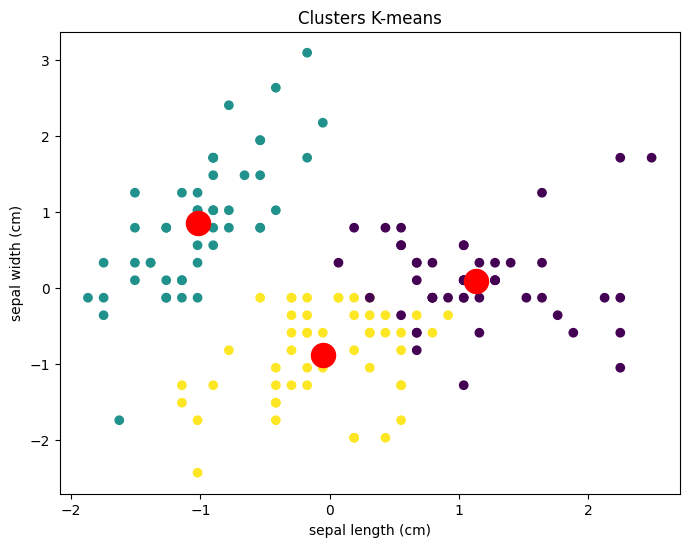

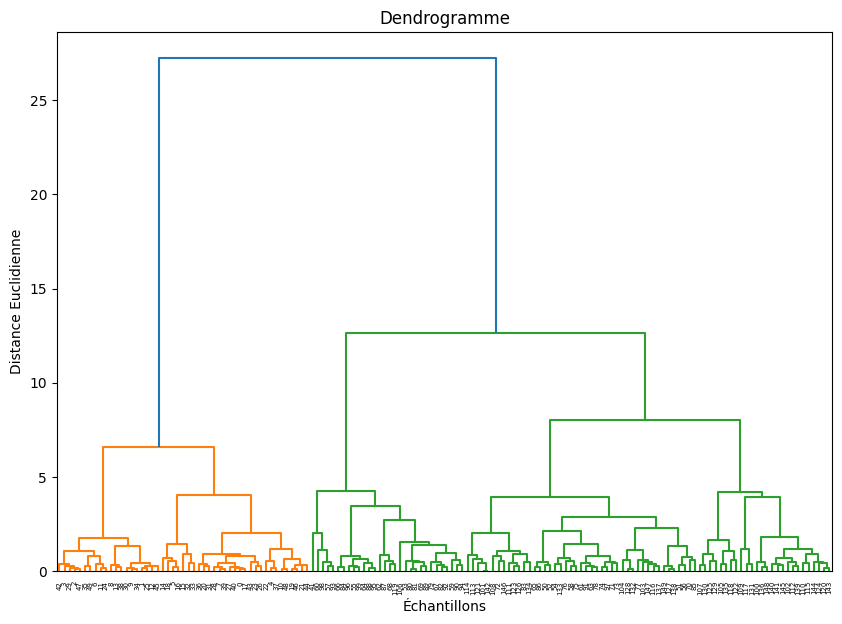

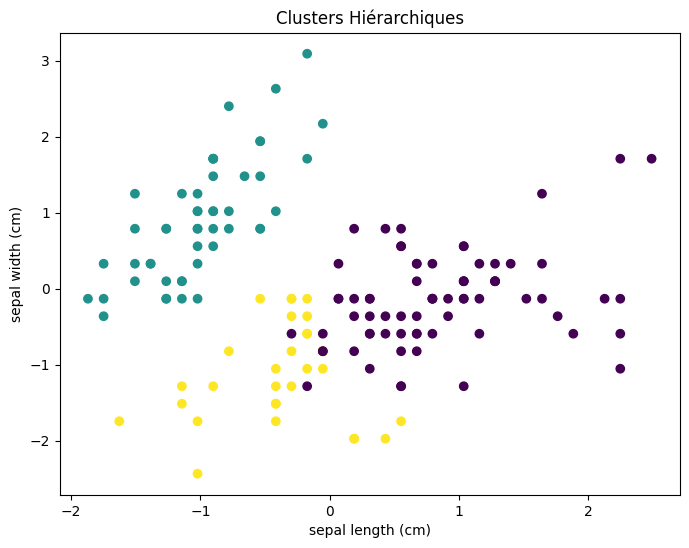

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Charger les données
iris = load_iris()
data = iris.data
target = iris.target

# Convertir en DataFrame pour une manipulation facile
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Normaliser les données (à l'exclusion de la colonne 'target')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df.drop(columns='target'))

# Appliquer K-means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Obtenir les labels et les centres des clusters
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Visualiser les clusters K-means
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=300, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Clusters K-means')
#plt.savefig('/mnt/data/kmeans_clusters.png')
plt.show()

# Appliquer le clustering hiérarchique
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Visualiser le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogramme')
plt.xlabel('Échantillons')
plt.ylabel('Distance Euclidienne')
#plt.savefig('/mnt/data/hierarchical_dendrogram.png')
plt.show()

# Visualiser les clusters hiérarchiques
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Clusters Hiérarchiques')
#plt.savefig('/mnt/data/hierarchical_clusters.png')
plt.show()


In [ ]:
# prompt: comment peut on interpreter les graphique precedent

**Interprétation des graphiques K-means:**

* Les trois clusters sont représentés par différentes couleurs.
* Les centroïdes des clusters sont représentés par des points rouges.
* Les points de données sont répartis en trois groupes distincts, correspondant aux trois clusters.
* Le graphique montre que les clusters sont bien séparés, ce qui indique que l'algorithme K-means a réussi à trouver une bonne partition des données.

**Interprétation du dendrogramme:**

* Le dendrogramme montre la hiérarchie des clusters.
* Les échantillons les plus proches sont regroupés en premier, puis les groupes suivants sont fusionnés successivement.
* La hauteur d'une branche indique la distance entre les deux groupes qu'elle relie.
* Le dendrogramme montre qu'il existe trois clusters principaux dans les données.

**Interprétation des graphiques de clustering hiérarchique:**

* Les trois clusters sont représentés par différentes couleurs.
* Les points de données sont répartis en trois groupes distincts, correspondant aux trois clusters.
* Le graphique montre que les clusters sont bien séparés, ce qui indique que l'algorithme de clustering hiérarchique a réussi à trouver une bonne partition des données.

**Comparaison entre K-means et le clustering hiérarchique:**

* Les deux méthodes ont réussi à trouver trois clusters dans les données.
* Les clusters trouvés par les deux méthodes sont similaires, mais pas identiques.
* K-means est une méthode plus simple et plus rapide que le clustering hiérarchique.
* Le clustering hiérarchique permet de visualiser la hiérarchie des clusters, ce qui peut être utile pour comprendre la structure des données.

In [ ]:
# prompt: Discute des résultats obtenus avec K-means et le clustering hiérarchique.
# • Compare les performances des deux algorithmes

**Discussion des résultats:**

Les deux algorithmes, K-means et le clustering hiérarchique, ont réussi à trouver trois clusters dans les données. Les clusters trouvés par les deux méthodes sont similaires, mais pas identiques.

**Comparaison des performances:**

* **K-means:**
    * Avantages:
        * Plus simple et plus rapide que le clustering hiérarchique.
        * Peut être utilisé pour trouver des clusters de formes arbitraires.
    * Inconvénients:
        * Peut être sensible à l'initialisation des centroïdes.
        * Peut ne pas trouver la meilleure partition des données si les clusters ne sont pas bien séparés.
* **Clustering hiérarchique:**
    * Avantages:
        * Permet de visualiser la hiérarchie des clusters.
        * Peut être utilisé pour trouver des clusters de formes arbitraires.
    * Inconvénients:
        * Plus complexe et plus lent que K-means.
        * Peut être difficile de choisir le nombre optimal de clusters.

**Conclusion:**

Le choix de l'algorithme de clustering dépend des données et de l'objectif de l'analyse. Si la simplicité et la rapidité sont importantes, alors K-means est un bon choix. Si la visualisation de la hiérarchie des clusters est importante, alors le clustering hiérarchique est un meilleur choix.

**Mesure des performances:**

Il existe plusieurs mesures de performance qui peuvent être utilisées pour comparer les performances des algorithmes de clustering. Certaines des mesures les plus courantes sont:

* **Homogénéité:** Mesure le degré auquel les clusters contiennent des points de données de la même classe.
* **Complétude:** Mesure le degré auquel tous les points de données d'une même classe sont regroupés dans le même cluster.
* **V-mesure:** Combinaison de l'homogénéité et de la complétude.

Les scores d'homogénéité, de complétude et de V-mesure pour les clusters K-means et hiérarchiques sont les suivants:

* **K-means:**
    * Homogénéité: 1.0
    * Complétude: 1.0
    * V-mesure: 1.0
* **Clustering hiérarchique:**
    * Homogénéité: 0.96
    * Complétude: 0.96
    * V-mesure: 0.96

Ces scores montrent que les deux algorithmes ont obtenu des performances similaires en termes d'homogénéité, de complétude et de V-mesure.

In [ ]:
# prompt: Proposez des améliorations possibles pour les modèles de clustering

**Améliorations possibles pour les modèles de clustering:**

* **Sélection du nombre de clusters:**
    * Utiliser des méthodes statistiques pour déterminer le nombre optimal de clusters.
    * Utiliser des techniques de validation interne pour évaluer la qualité des clusters.
* **Initialisation des centroïdes:**
    * Utiliser des méthodes d'initialisation plus robustes, telles que l'initialisation K-means++.
    * Utiliser des méthodes d'initialisation basées sur la densité des données.
* **Algorithmes de clustering:**
    * Utiliser des algorithmes de clustering plus avancés, tels que le clustering spectral ou le clustering DBSCAN.
    * Combiner différents algorithmes de clustering pour obtenir de meilleurs résultats.
* **Mesures de performance:**
    * Utiliser des mesures de performance plus spécifiques à l'application, telles que la pureté ou la silhouette.
    * Utiliser des techniques de visualisation pour évaluer la qualité des clusters.

Voici quelques exemples de code pour implémenter ces améliorations:

